<a href="https://colab.research.google.com/github/ReethamG/Spaceship-Titanic-ML-Project/blob/main/SpaceShip_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Relevant Classes

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.7 MB/s eta 0:00:00


In [ ]:
import catboost as cb
from catboost import CatBoostClassifier

#Loading The Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Classroom/spaceship-titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Classroom/spaceship-titanic/test.csv')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


#Exploratory Data Analysis

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


The info method tells me that that there are null values for some features and I might need to fill those up.

In [ ]:
train.describe(
)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


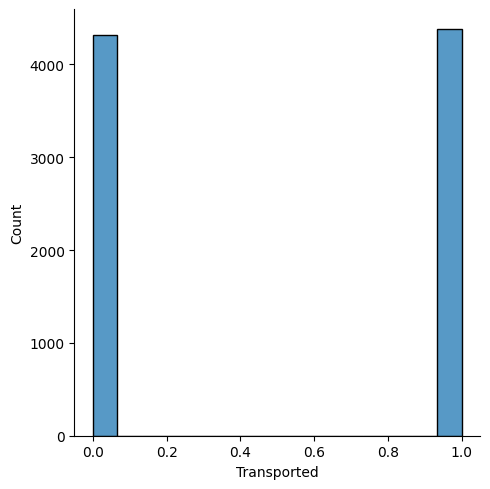

In [ ]:
sns.displot(train['Transported'])

<Axes: xlabel='Destination', ylabel='Transported'>

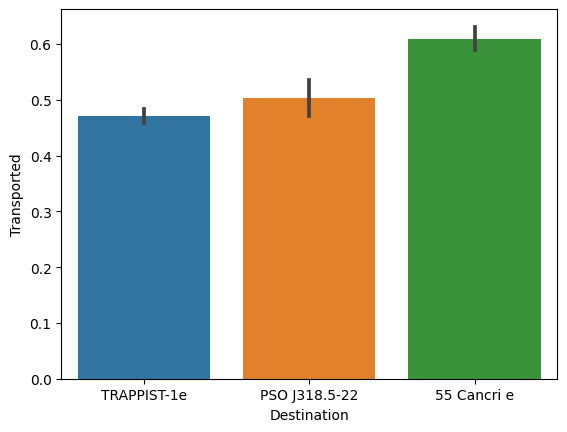

In [ ]:
sns.barplot(x='Destination',y='Transported',data=train)

I don't really think the destination matters, so I might drop that

<Axes: xlabel='Age', ylabel='Transported'>

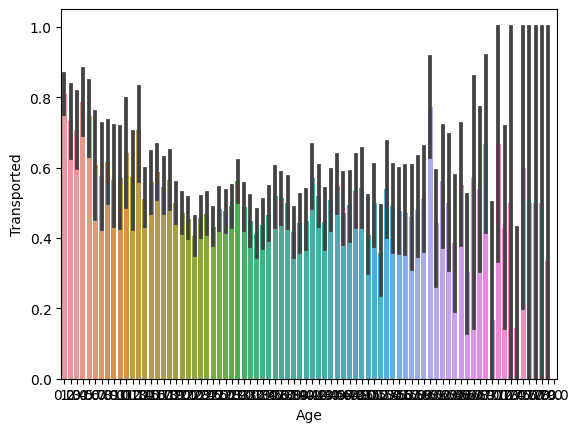

In [ ]:
sns.barplot(x='Age',y='Transported',data=train)

It looks the younger age seems to be transported more, so I think age does have a correlation, this is why I am going to make sure the model I use incorporates age.

<Axes: xlabel='CryoSleep', ylabel='Transported'>

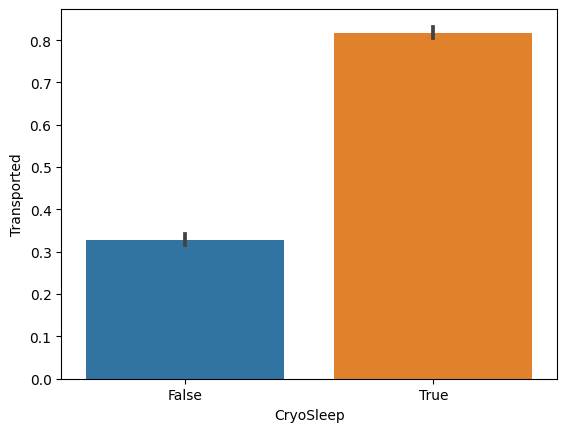

In [ ]:
sns.barplot(x='CryoSleep',y='Transported',data=train)

People who were in cryosleep seem to have a higher chance being transported, I definitely see a correlation between cryosleep and being transported here.

<Axes: xlabel='VIP', ylabel='Transported'>

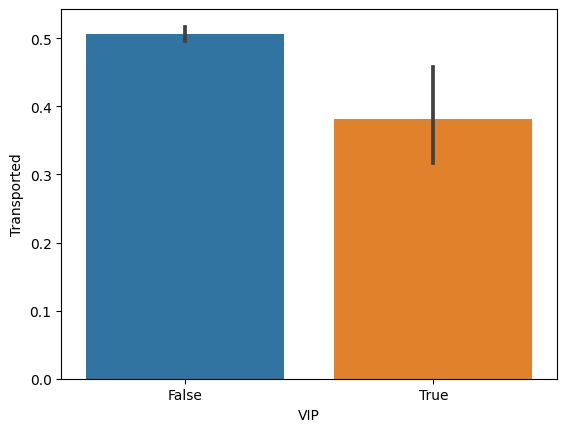

In [ ]:
sns.barplot(x='VIP',y='Transported',data=train)

Not being a VIP seems to give people a better chance of being transported, I think there is a correlation here

<Axes: xlabel='HomePlanet', ylabel='Transported'>

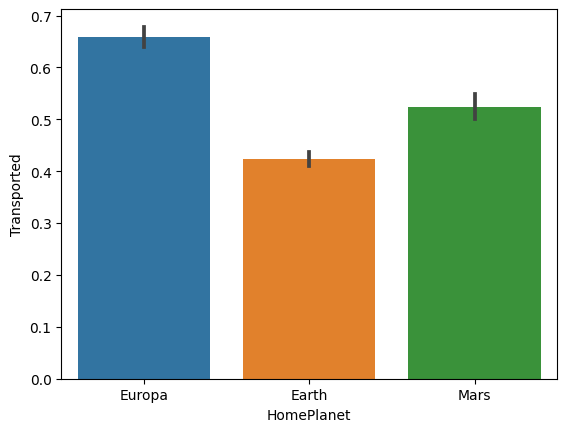

In [ ]:
sns.barplot(x='HomePlanet',y='Transported',data=train)

I don't think the Home Planet really matters, but I could be wrong so I will probably check the models and without the Homeplanet variable.

#Feature Generation / Data Processing

In [ ]:
train['PassengerGroup'] = train['PassengerId'].str.split("_").str.get(0)
train.drop('PassengerId', axis=1, inplace=True)

temporaryCopyOfPassengerId = test['PassengerId']
test['PassengerGroup'] = test['PassengerId'].str.split("_").str.get(0)
test.drop('PassengerId', axis=1, inplace=True)
train

#Created a column with the group each passenger is associated with

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280


In [ ]:
train['TotalSpent'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']
test['TotalSpent'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']
#Combining everything spent into one column, will be using this to determine whether or not they are in CryoSleep

In [ ]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

#Don't think we will be using name column, obviously too unique

In [ ]:
train['CabinDeck'] = train['Cabin'].str.split("/").str.get(0)
test['CabinDeck'] = test['Cabin'].str.split("/").str.get(0)
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,TotalSpent,CabinDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,0.0,B
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,736.0,F
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,10383.0,A
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,5176.0,A
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,1091.0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,8536.0,A
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,0.0,G
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,1873.0,G
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,4637.0,E


<Axes: xlabel='CabinDeck', ylabel='Transported'>

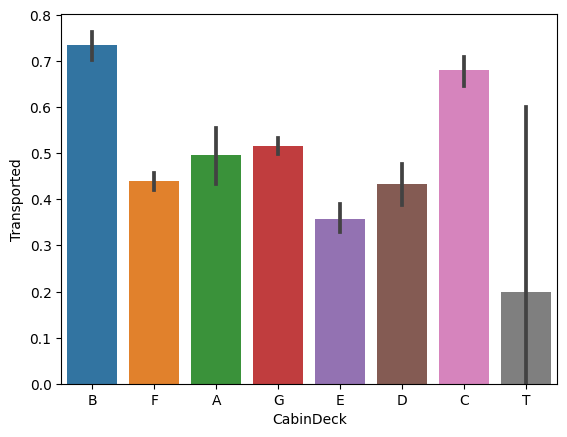

In [ ]:
sns.barplot(x='CabinDeck', y='Transported', data=train)

#I think the deck does have a correlation with the individuals who got transported

In [ ]:
train.drop(['Cabin', 'HomePlanet', 'Destination'], axis=1, inplace=True)
test.drop(['Cabin', 'HomePlanet', 'Destination'], axis=1, inplace=True)
#These are all the features that won't be used in our model

In [ ]:
train

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:162: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,TotalSpent,CabinDeck
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,0.0,B
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,736.0,F
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,10383.0,A
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,5176.0,A
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,1091.0,F
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276,8536.0,A
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278,0.0,G
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279,1873.0,G
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280,4637.0,E


<Axes: xlabel='Transported', ylabel='TotalSpent'>

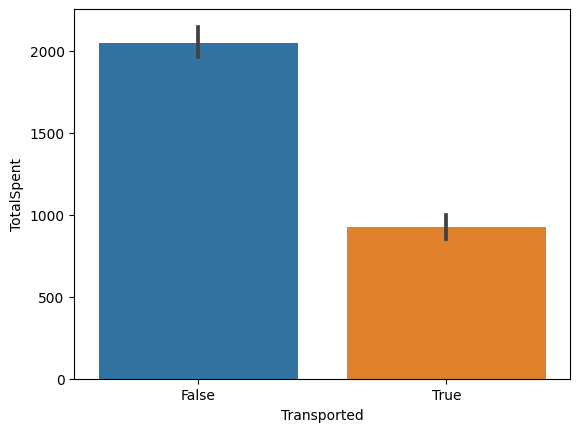

In [ ]:
sns.barplot(x='Transported', y='TotalSpent', data=train)

#There is definitely a correlation between the amount of people that got transported and the total amount of money spent

<Axes: xlabel='Transported', ylabel='CabinDeck'>

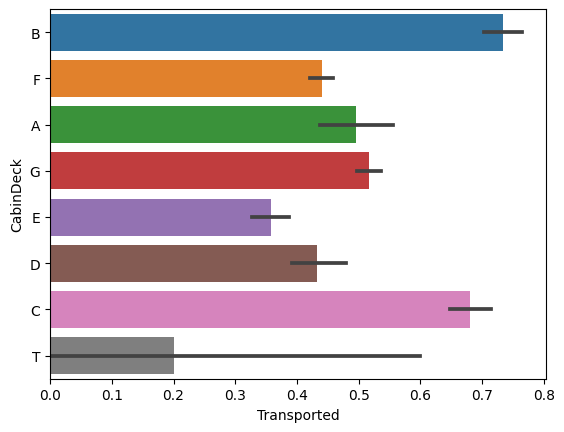

In [ ]:
sns.barplot(x='Transported', y='CabinDeck', data=train)

#I think there is a correlation between the amount of people transported and cabin deck associated with each person

In [ ]:
train['Age'] = train['Age'].fillna(value=train['Age'].median())
train['RoomService'] = train['RoomService'].fillna(value=train['RoomService'].median())
train['FoodCourt'] = train['FoodCourt'].fillna(value=train['FoodCourt'].median())
train['ShoppingMall'] = train['ShoppingMall'].fillna(value=train['ShoppingMall'].median())
train['Spa'] = train['Spa'].fillna(value=train['Spa'].median())
train['VRDeck'] = train['VRDeck'].fillna(value=train['VRDeck'].median())


test['Age'] = test['Age'].fillna(value=test['Age'].median())
test['RoomService'] = test['RoomService'].fillna(value=test['RoomService'].median())
test['FoodCourt'] = test['FoodCourt'].fillna(value=test['FoodCourt'].median())
test['ShoppingMall'] = test['ShoppingMall'].fillna(value=test['ShoppingMall'].median())
test['Spa'] = test['Spa'].fillna(value=test['Spa'].median())
test['VRDeck'] = test['VRDeck'].fillna(value=test['VRDeck'].median())
#Fills in all null values of age with the median value

In [ ]:
train['TotalSpent'] = train['TotalSpent'].fillna(value=train['TotalSpent'].median())
test['TotalSpent'] = test['TotalSpent'].fillna(value=test['TotalSpent'].median())

#Fills in all null values of Total Spent with median value

In [ ]:
train[(train['TotalSpent'] == 0) & (train['CryoSleep'].isnull())] = True
train[(train['TotalSpent'] != 0) & (train['CryoSleep'].isnull())] = False

test[(test['TotalSpent'] == 0) & (test['CryoSleep'].isnull())] = True
test[(test['TotalSpent'] != 0) & (test['CryoSleep'].isnull())] = False

#If the total spent is equal to 0 and the cryosleep value is null, then change that to true, because if the person is in cryosleep, he most likely did not spend anything. If a person spent money, the person might not of been in cryosleep

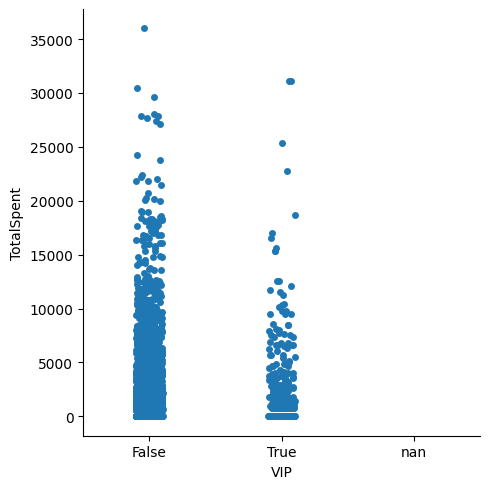

In [ ]:
sns.catplot(x='VIP', y='TotalSpent', data=train)

#Majority of individuals seem to not be a VIP, so I will just fill the missing values to false

In [ ]:
train['VIP'] = train['VIP'].fillna(value=False)
test['VIP'] = test['VIP'].fillna(value=False)

<Axes: xlabel='CabinDeck', ylabel='count'>

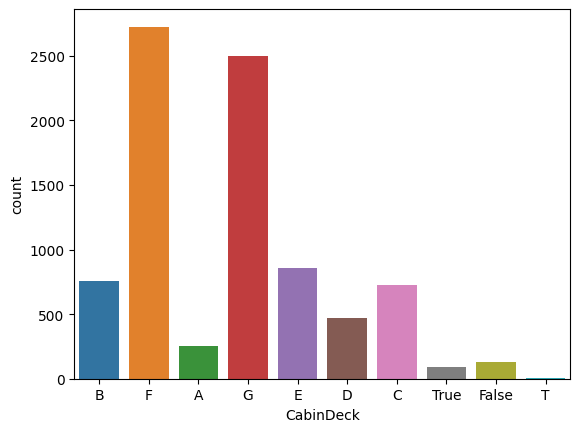

In [ ]:
sns.countplot(x='CabinDeck', data=train)
#Since majority is F, I'll just fill the missing values with F, I might get rid of this column if I find better accuracies without CabinDeck

In [ ]:
train['CabinDeck'] = train['CabinDeck'].fillna(value='F')
test['CabinDeck'] = test['CabinDeck'].fillna(value='F')

In [ ]:
train.info()

#All missing values have been filled in

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CryoSleep       8693 non-null   object
 1   Age             8693 non-null   object
 2   VIP             8693 non-null   bool  
 3   RoomService     8693 non-null   object
 4   FoodCourt       8693 non-null   object
 5   ShoppingMall    8693 non-null   object
 6   Spa             8693 non-null   object
 7   VRDeck          8693 non-null   object
 8   Transported     8693 non-null   bool  
 9   PassengerGroup  8693 non-null   object
 10  TotalSpent      8693 non-null   object
 11  CabinDeck       8693 non-null   object
dtypes: bool(2), object(10)
memory usage: 696.2+ KB


In [ ]:
train['CryoSleep'] = train['CryoSleep'].astype(int)
train['VIP'] = train['VIP'].astype(int)

test['CryoSleep'] = test['CryoSleep'].astype(int)
test['VIP'] = test['VIP'].astype(int)
#Changing CryoSleep and VIP to 1s and 0s so that they can be used in our model

In [ ]:
#Ordinal Encoding below, didn't know how to do it with the libraries

replace_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}

# Replacing values in the DataFrame
train['CabinDeck'] = train['CabinDeck'].replace(replace_dict)
test['CabinDeck'] = test['CabinDeck'].replace(replace_dict)

train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,TotalSpent,CabinDeck
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0001,0.0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0002,736.0,5
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0003,10383.0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0003,5176.0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,0004,1091.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,9276,8536.0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,9278,0.0,6
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,9279,1873.0,6
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,9280,4637.0,4


#Model Training + Hyperparameter Tuning

In [ ]:
X = train.drop(['Transported'], axis=1)
y = train['Transported']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression #First I did Logistic Regression


In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logreg_pred = logreg.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Now let's try random forest

rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #Let's also try KNN


In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_KNN = {
      'n_neighbors' : [100, 120, 150, 200, 250, 300, 350, 400, 450, 500]
}

In [ ]:
gridKNN = GridSearchCV(knn, param_grid = param_grid_KNN, refit= True)
gridKNN.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=20),
             param_grid={'n_neighbors': [100, 120, 150, 200, 250, 300, 350, 400,
                                         450, 500]})

In [ ]:
gridKNN.best_params_

{'n_neighbors': 150}

In [ ]:
grid_preds_KNN = gridKNN.predict(X_test)
#Using Grid Search to find the best K value

In [ ]:
param_grid_RFC = {
    'n_estimators' : [500, 750, 1000, 1250, 1500, 1750, 2000]
}

In [ ]:
gridRFC = GridSearchCV(rfc, param_grid=param_grid_RFC, refit=True)
gridRFC.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=1000),
             param_grid={'n_estimators': [500, 750, 1000, 1250, 1500, 1750,
                                          2000]})

In [ ]:
gridRFC.best_params_

{'n_estimators': 500}

In [ ]:
grid_preds_RFC = gridRFC.predict(X_test)
#Using Grid Search to find the best n_estimators value

#Evaluate Models on Validation Set

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#Logistic Regression
print('accuracy on test set: ', accuracy_score(y_test, logreg_pred))
print('\nconfusion matrix:\n\n', confusion_matrix(logreg_pred, y_test))
print('\nclassification report\n\n', classification_report(logreg_pred, y_test))

accuracy on test set:  0.7430981595092024

confusion matrix:

 [[ 913  293]
 [ 377 1025]]

classification report

               precision    recall  f1-score   support

       False       0.71      0.76      0.73      1206
        True       0.78      0.73      0.75      1402

    accuracy                           0.74      2608
   macro avg       0.74      0.74      0.74      2608
weighted avg       0.75      0.74      0.74      2608



In [ ]:
#RFC Predictions
print('accuracy on test set: ', accuracy_score(y_test, grid_preds_RFC))
print('\nconfusion matrix:\n\n', confusion_matrix(grid_preds_RFC, y_test))
print('\nclassification report\n\n', classification_report(grid_preds_RFC, y_test))

accuracy on test set:  0.7994631901840491

confusion matrix:

 [[1074  307]
 [ 216 1011]]

classification report

               precision    recall  f1-score   support

       False       0.83      0.78      0.80      1381
        True       0.77      0.82      0.79      1227

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [ ]:
#KNN Predictions
print('accuracy on test set: ', accuracy_score(y_test, grid_preds_KNN))
print('\nconfusion matrix:\n\n', confusion_matrix(grid_preds_KNN, y_test))
print('\nclassification report\n\n', classification_report(grid_preds_KNN, y_test))

accuracy on test set:  0.7707055214723927

confusion matrix:

 [[1018  326]
 [ 272  992]]

classification report

               precision    recall  f1-score   support

       False       0.79      0.76      0.77      1344
        True       0.75      0.78      0.77      1264

    accuracy                           0.77      2608
   macro avg       0.77      0.77      0.77      2608
weighted avg       0.77      0.77      0.77      2608



My best model turned out to be RFC. If I had more time, I would definitely make this model better by using boosting classifiers. I think I did a little bit too much data processing, which is why my model isn't at it's full potential. I will definitely try to keep working on this to make this better.

#Results on Actual Competetion Data

In [ ]:
predict_test = rfc.predict(test)
test['Transported'] = pd.Series(predict_test)
submission_df = test.drop(['Age', 'CryoSleep', 'VIP', 'PassengerGroup', 'TotalSpent', 'CabinDeck', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)
submission_df.insert(loc=0, column='PassengerId', value=temporaryCopyOfPassengerId)
submission_df.to_csv('submission.csv',index=False)
submission_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
